## Copyright (c) 2018, Manuj Chandra
All rights reserved.

Redistribution and use in source and binary forms, with or without modification, are permitted 
provided that the following conditions are met:

- Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

- Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

# Common Mistakes with Correlation

From : https://www.investopedia.com/ask/answers/031015/how-can-you-calculate-correlation-using-excel.asp

The single most common mistake is assuming a correlation approaching +/- 1 is statistically significant.  A reading approaching +/- 1 definitely increases the chances of actual statistical significance, but without further testing it's impossible to know. The statistical testing of a correlation can get complicated for a number of reasons; it's not at all straightforward.  A critical assumption of correlation is that the variables are independent and that the relationship between them is linear. In theory, you would test these claims to determine if a correlation calculation is appropriate.  

The second most common mistake is forgetting to normalize the data into a common unit.  If calculating a correlation on two betas, then the units are already normalized: beta itself is the unit.  However, if you want to correlate stocks, it's critical you normalize them into percent return, and not share price changes.  This happens all too frequently, even among investment professionals.  

For stock price correlation, you are essentially asking two questions: What is the return over a certain number of periods, and how does that return correlate to another security's return over the same period?  This is also why correlating stock prices is difficult: Two securities might have a high correlation if the return is daily percent changes over the past 52 weeks, but a low correlation if the return is monthly changes over the past 52 weeks.  Which one is "better"? There really is no perfect answer, and it depends on the purpose of the test. 

For pairs trading, we need co-integration, not correlation.

In [2]:
import datetime
from datetime import date, timedelta
from nsepy import get_history
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
end_date = date.today()

#Last 52 Weeks data
start_date = end_date - timedelta(52*7)

In [4]:
# https://www.nseindia.com/products/content/equities/indices/nifty_next_50.htm
# Every time the ind_nifty50list.csv is updated, the NIFTY_stock_data.csv must be deleted
nifty50 = pd.read_csv('ind_nifty50list.csv')

In [5]:
nifty50.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [6]:
if not os.path.isfile('NIFTY_stock_data.csv'):
    
    stock_price_dataframe = pd.DataFrame()
    
    for stock in nifty50['Symbol']:
        stock_price_dataframe[stock] = get_history(symbol=stock, start=start_date, end=end_date)['Close']
        
    #change date before saving
    stock_price_dataframe.index = pd.to_datetime(stock_price_dataframe.index, format = '%Y-%m-%d').strftime('%d-%m-%Y')
       
    stock_price_dataframe.to_csv('NIFTY_stock_data.csv', mode='a', sep=',', index_label='Date')
    
else:    
    #Find the date range between which the stock data need to be appended
    temporary_dataframe = pd.read_csv('NIFTY_stock_data.csv', index_col='Date')

    date_str = temporary_dataframe.iloc[-1].name
    format_str = '%d-%m-%Y' # The format

    last_updated_date = datetime.datetime.strptime(date_str, format_str).date()
    today_date = date.today()

    continue_date = last_updated_date + timedelta(1)
    yesterday_date = today_date - timedelta(1)
    
    
    updated_stock_price_dataframe = pd.DataFrame()
    # only download new data if last date is not the same as current date
    if last_updated_date != yesterday_date:
        print('Downloading and updating stock prices from {} to {}.'.format(continue_date, yesterday_date))
        
        for stock in nifty50['Symbol']:
            updated_stock_price_dataframe[stock] = get_history(symbol=stock, start=continue_date, end=yesterday_date)['Close']
        
        # change date before saving
        updated_stock_price_dataframe.index = pd.to_datetime(updated_stock_price_dataframe.index, format = '%Y-%m-%d').strftime('%d-%m-%Y')
        
        updated_stock_price_dataframe.to_csv('NIFTY_stock_data.csv', mode='a', sep=',', header=False)
    else:
        print('Data is current, No update needed')
    
stocks_close_price = pd.read_csv('NIFTY_stock_data.csv')

In [7]:
# Run this for percent change coorelation
for stock in nifty50['Symbol']:
    stocks_close_price[stock] = stocks_close_price[stock].pct_change(1)

In [8]:
stocks_close_price.describe()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,INFRATEL,CIPLA,...,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,-0.001240,0.000119,0.000605,-0.000958,0.001296,0.000488,-0.002367,-0.001818,-0.001814,-0.000022,...,-0.003637,-0.000860,0.001380,0.001312,-0.000904,-0.001017,-0.001839,0.000446,-0.001767,-0.000972
std,0.018170,0.013648,0.018959,0.015825,0.022079,0.018638,0.025537,0.021392,0.017267,0.015960,...,0.021062,0.020563,0.018645,0.021799,0.021925,0.015028,0.022508,0.012959,0.029882,0.014179
min,-0.069833,-0.051608,-0.047065,-0.088411,-0.071519,-0.061981,-0.198852,-0.066247,-0.060912,-0.072159,...,-0.131858,-0.091255,-0.070004,-0.078729,-0.067091,-0.048276,-0.107490,-0.040658,-0.290414,-0.046664
25%,-0.011104,-0.007873,-0.011258,-0.009590,-0.010598,-0.010644,-0.014583,-0.013400,-0.011930,-0.009397,...,-0.012989,-0.013161,-0.010260,-0.009896,-0.014274,-0.010490,-0.014074,-0.005940,-0.011083,-0.010734
50%,-0.000583,-0.000988,-0.000322,-0.000751,0.001263,0.000258,-0.001996,-0.003106,-0.001104,-0.001480,...,-0.003540,0.000479,0.000640,0.000431,-0.001490,-0.001142,-0.002433,0.000383,-0.000824,-0.000672
75%,0.009035,0.007105,0.010232,0.007577,0.011891,0.009966,0.012258,0.007618,0.008799,0.006801,...,0.007196,0.012424,0.013655,0.010396,0.010322,0.009768,0.012285,0.007738,0.011322,0.007534
max,0.047409,0.056459,0.092051,0.053176,0.109655,0.098064,0.060901,0.104757,0.050868,0.076241,...,0.045886,0.063054,0.053067,0.187874,0.150109,0.038410,0.070766,0.053810,0.093656,0.062384


In [9]:
daily_percent_change = stocks_close_price.iloc[1:]

In [10]:
daily_percent_change.head()

,Date,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,INFRATEL,...,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,VEDL,WIPRO,YESBANK,ZEEL
1,31-10-2017,0.001280,-0.001438,0.080888,-0.007647,-0.002051,0.003103,0.009977,0.008724,0.028974,...,-0.018669,-0.020118,-0.007208,0.027414,-0.030446,-0.015920,-0.026690,0.002728,-0.001906,-0.012933
2,01-11-2017,0.006390,-0.004150,0.022842,-0.005327,0.003416,0.002445,-0.003323,0.084272,-0.035282,...,0.021825,0.004973,0.013380,0.003463,-0.021581,0.005737,0.034654,-0.001700,0.014479,-0.011257
3,02-11-2017,0.009582,0.002083,-0.005513,0.000417,0.001910,-0.008054,0.005650,0.007605,-0.018521,...,-0.006511,-0.001697,-0.042068,0.027767,-0.003516,-0.006134,-0.007427,-0.001022,0.005176,-0.012225
4,03-11-2017,-0.005489,-0.005049,0.014939,-0.007297,0.014777,0.010126,-0.017961,-0.003590,-0.011704,...,0.029432,0.003965,-0.009616,0.007021,-0.004748,-0.005467,-0.007923,0.004433,0.017163,0.018328
5,06-11-2017,0.006209,-0.008614,-0.010368,-0.002362,-0.008138,-0.004570,-0.016695,-0.016074,0.024894,...,0.033951,-0.002962,-0.006473,0.187874,-0.017664,0.012034,0.002366,0.017994,-0.019328,-0.015493


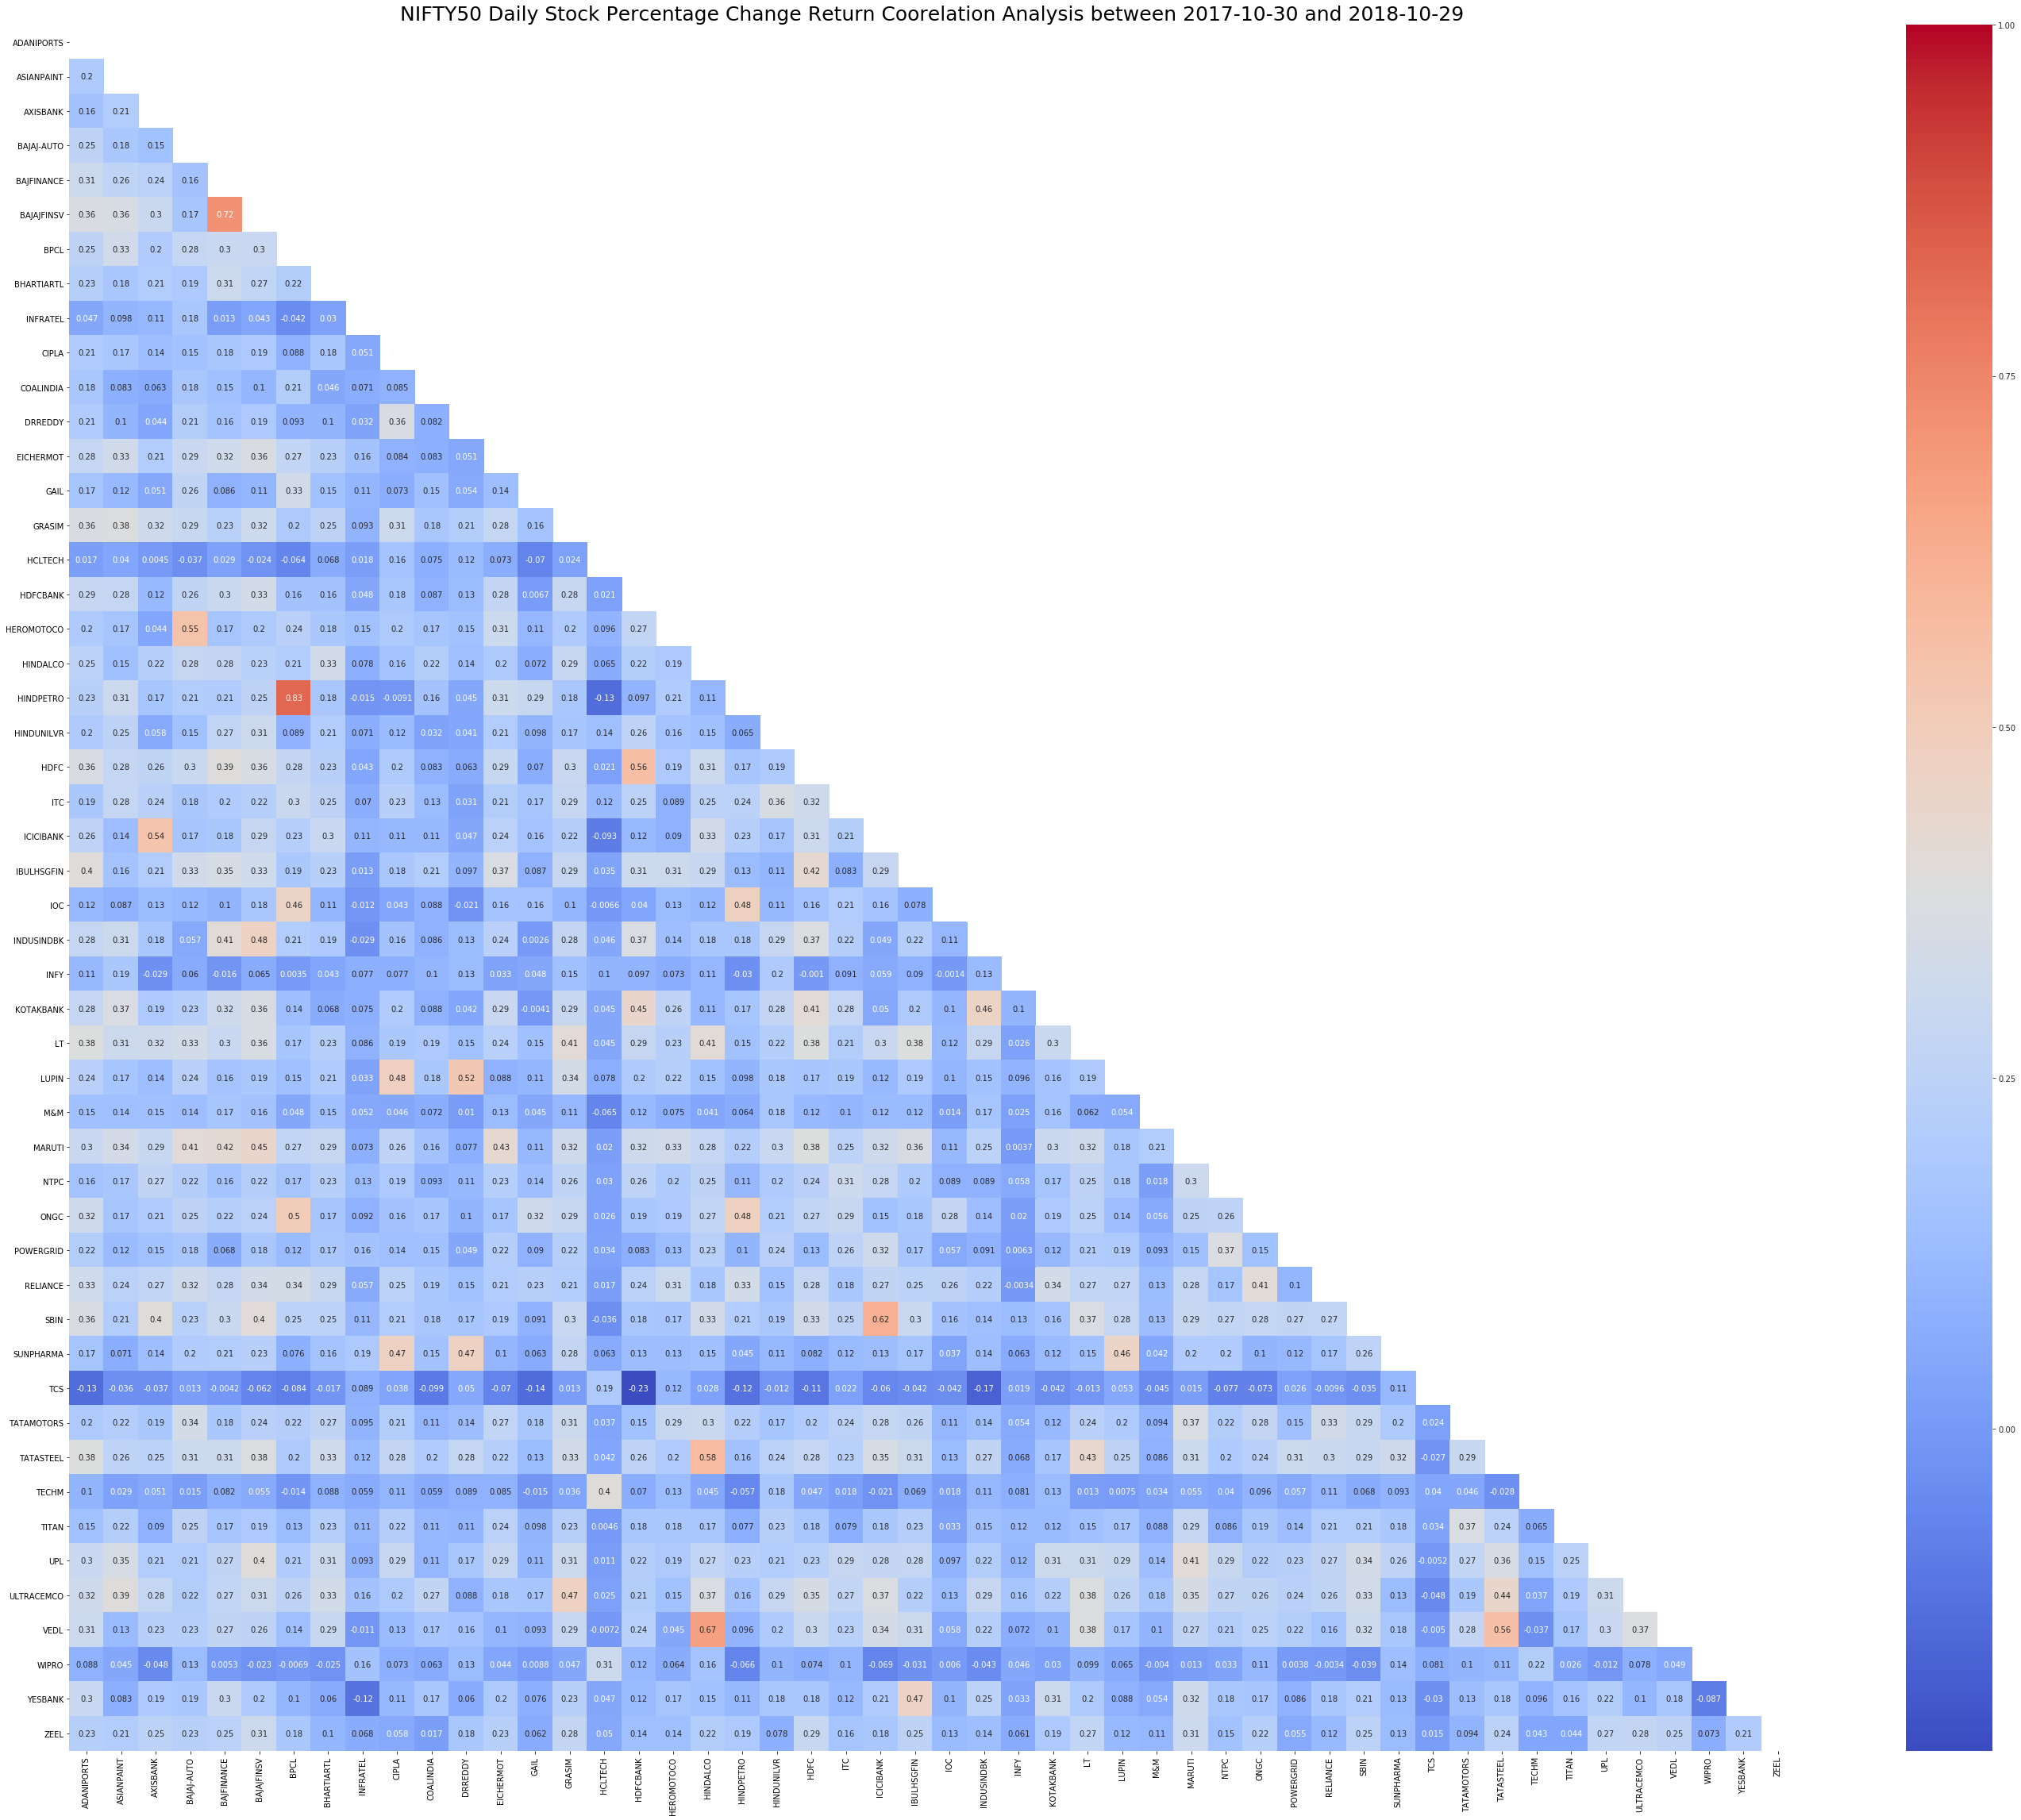

In [21]:
fig, ax = plt.subplots(figsize=(50,40)) # figsize in inches

ax.set_title("NIFTY50 Daily Stock Percentage Change Return Coorelation Analysis between {start} and {end}".format(start=start_date, end=end_date), fontsize=25)

mask = np.zeros_like(daily_percent_change.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(daily_percent_change.corr(), annot=True, cmap="coolwarm", mask=mask, square=True)

fig.savefig("NIFTY50CorrelationMatrix.png", dpi=300)

In [ ]:
#mask

In [12]:
nifty50.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [13]:
nifty50['Industry'].unique()

array(['SERVICES', 'CONSUMER GOODS', 'FINANCIAL SERVICES', 'AUTOMOBILE',
       'ENERGY', 'TELECOM', 'PHARMA', 'METALS',
       'CEMENT & CEMENT PRODUCTS', 'IT', 'CONSTRUCTION',
       'FERTILISERS & PESTICIDES', 'MEDIA & ENTERTAINMENT'], dtype=object)

In [14]:
industry_data_frame = pd.DataFrame()

for industry in nifty50['Industry'].unique():
    filter_symbol = nifty50['Industry'] == industry
    industry_symbols = nifty50[filter_symbol]['Symbol']
    
    industry_stocks_percent_change = daily_percent_change.loc[:, industry_symbols]
    
    industry_stocks_percent_change['Sum'] = industry_stocks_percent_change.sum(axis=1)
    
    industry_data_frame[industry] = industry_stocks_percent_change['Sum']

In [15]:
print(industry_data_frame.head())

   SERVICES  CONSUMER GOODS  FINANCIAL SERVICES  AUTOMOBILE    ENERGY  \
1  0.001280        0.030684            0.042710   -0.045993 -0.018336   
2  0.006390        0.031540            0.177884   -0.024148 -0.000605   
3  0.009582        0.001170           -0.034855   -0.034078  0.010369   
4 -0.005489       -0.000580            0.117496    0.008426 -0.031854   
5  0.006209        0.178263           -0.037794    0.064485 -0.031202   

    TELECOM    PHARMA    METALS  CEMENT & CEMENT PRODUCTS        IT  \
1  0.037698 -0.000083 -0.076519                  0.008028 -0.001810   
2  0.048990 -0.039309  0.069520                  0.022199 -0.008442   
3 -0.010915  0.098180 -0.009242                  0.030866 -0.018095   
4 -0.015294 -0.024827 -0.026942                 -0.009758 -0.015954   
5  0.008820 -0.018917  0.013767                  0.011025  0.028600   

   CONSTRUCTION  FERTILISERS & PESTICIDES  MEDIA & ENTERTAINMENT  
1     -0.011844                 -0.030446              -0.012933  


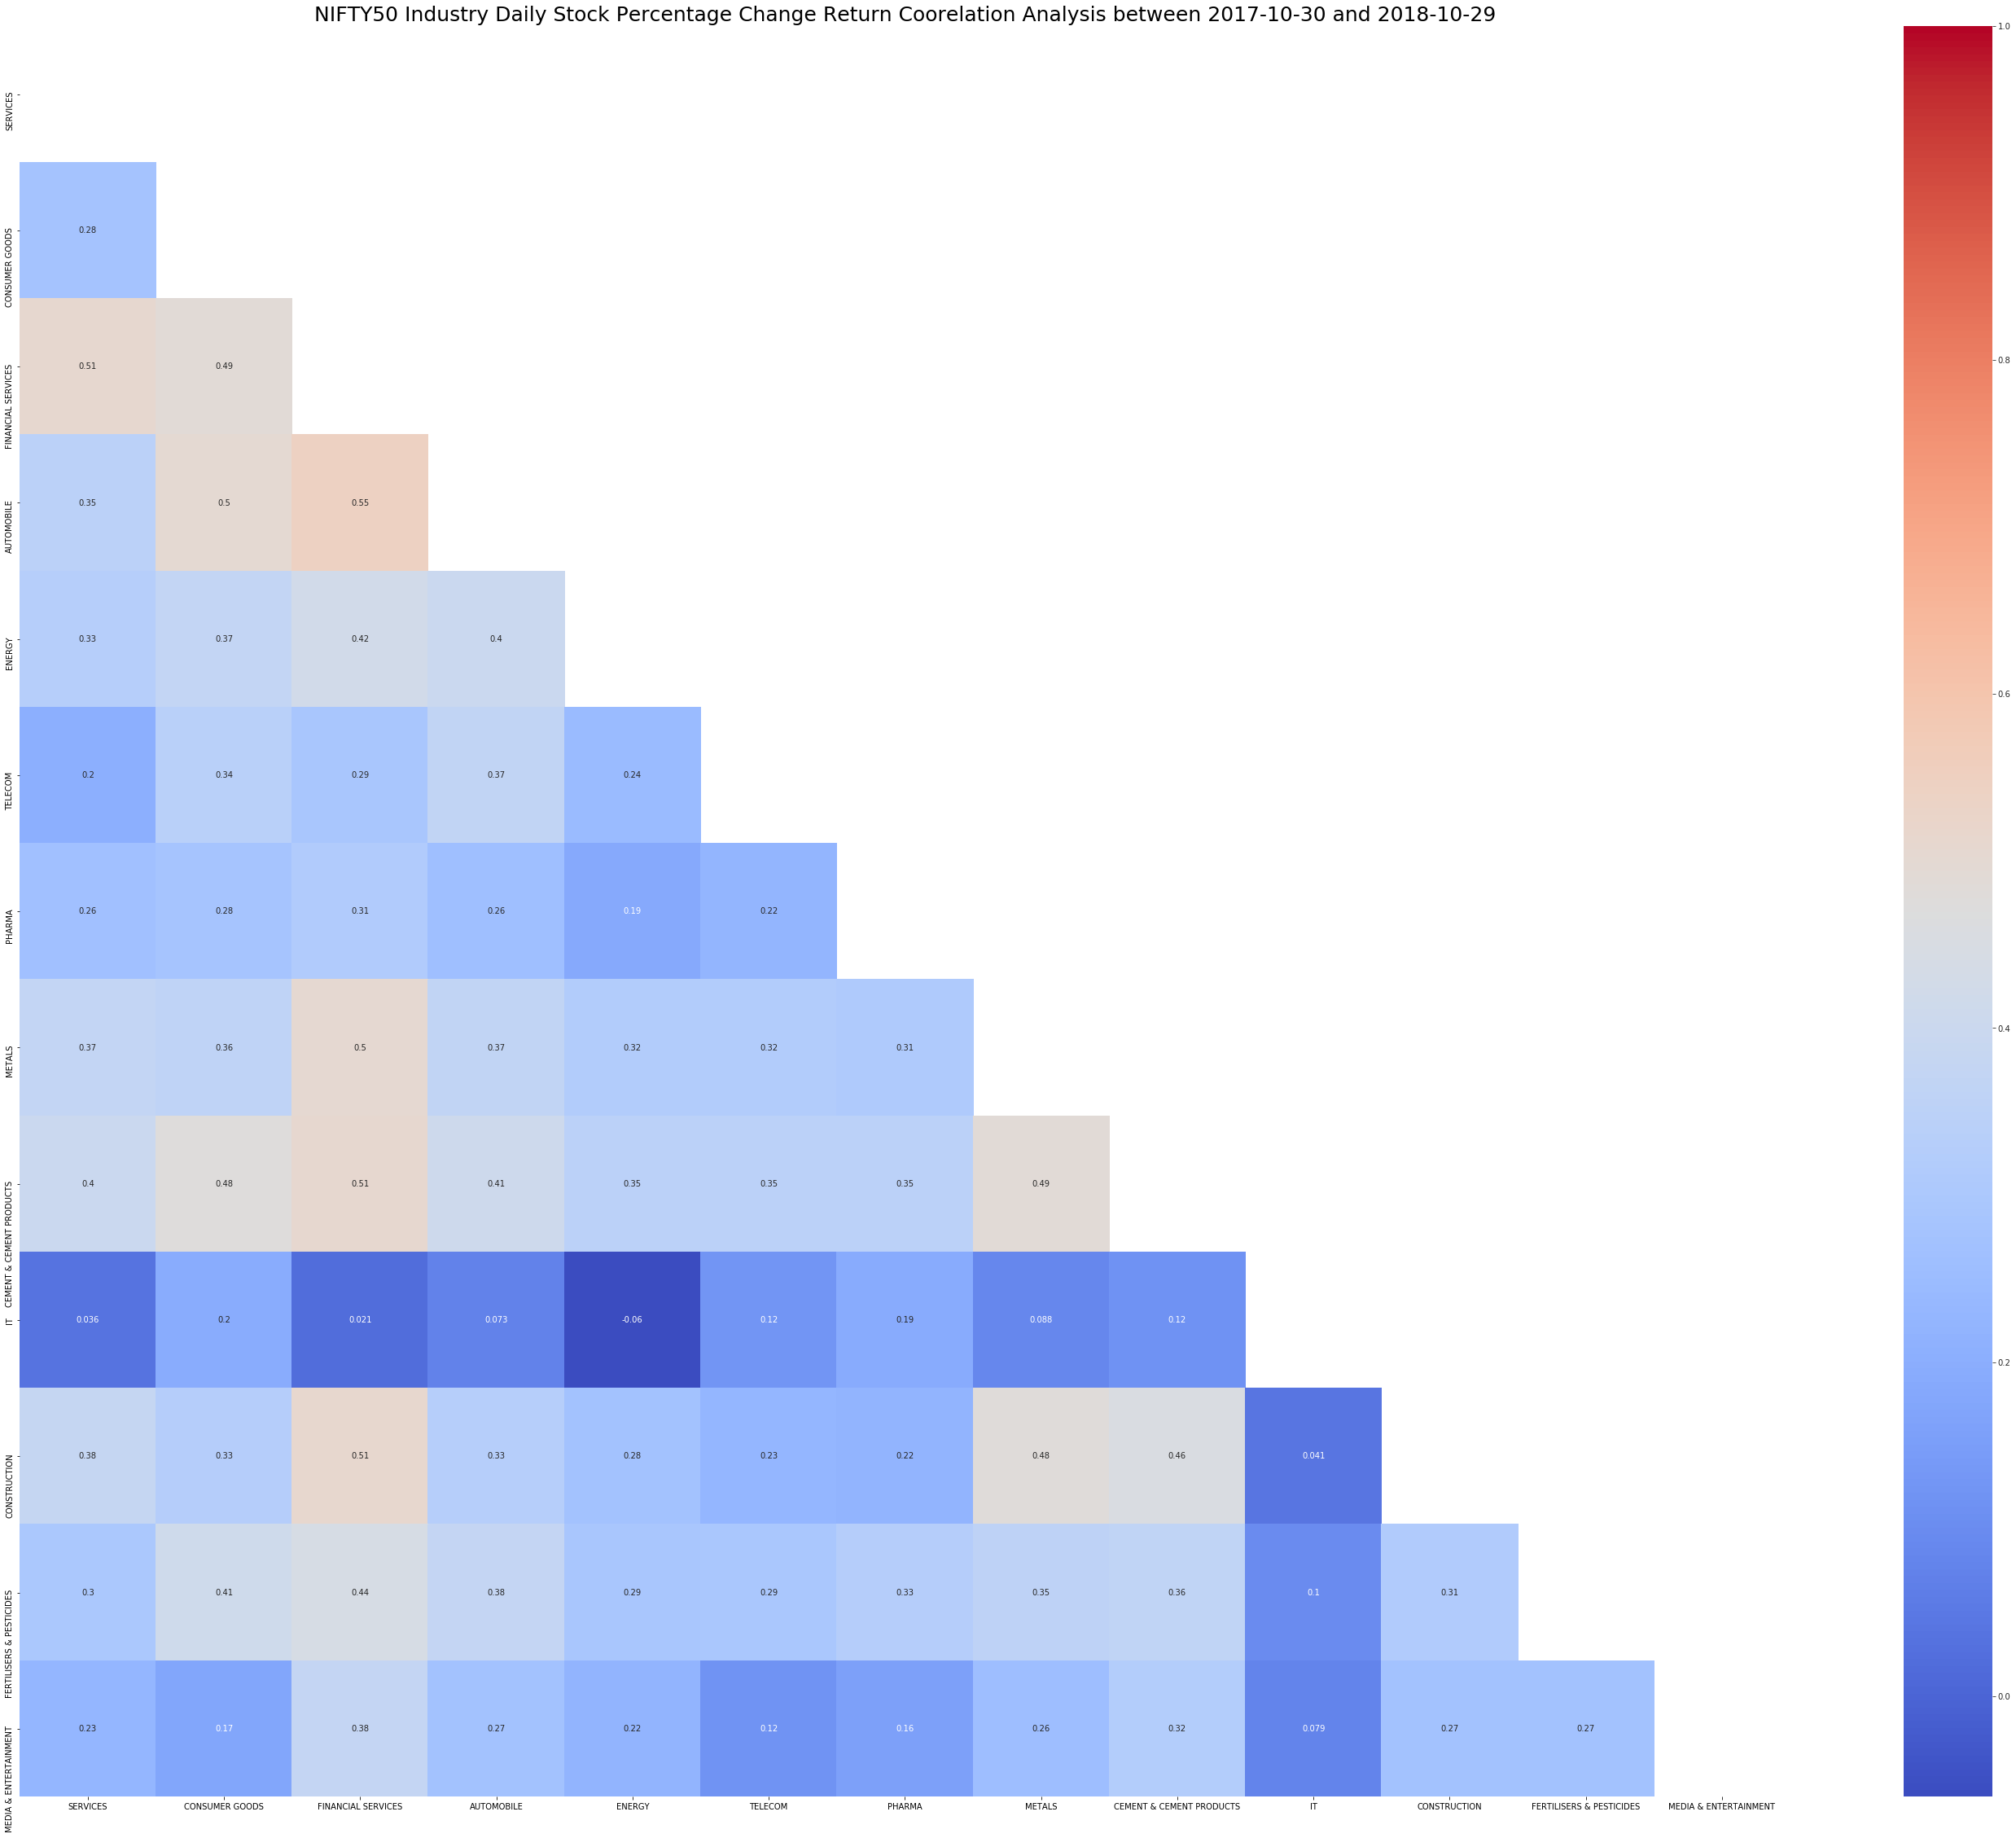

In [22]:
fig, ax = plt.subplots(figsize=(50,40)) # figsize in inches

ax.set_title("NIFTY50 Industry Daily Stock Percentage Change Return Coorelation Analysis between {start} and {end}".format(start=start_date, end=end_date), fontsize=25)

mask = np.zeros_like(industry_data_frame.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(industry_data_frame.corr(), annot=True, cmap="coolwarm", mask=mask, square=True)

fig.savefig("NIFTY50IndustryCorrelationMatrix.png", dpi=300)